* # Multivariate plotting

<table>
<tr>
<td><img src="https://i.imgur.com/gJ65O47.png" width="350px"/></td>
<td><img src="https://i.imgur.com/3qEqPoD.png" width="350px"/></td>
<td><img src="https://i.imgur.com/1fmV4M2.png" width="350px"/></td>
<td><img src="https://i.imgur.com/H20s88a.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Multivariate Scatter Plot</td>
<td style="font-weight:bold; font-size:16px;">Grouped Box Plot</td>
<td style="font-weight:bold; font-size:16px;">Heatmap</td>
<td style="font-weight:bold; font-size:16px;">Parallel Coordinates</td>
</tr>
<tr>
<td>df.plot.scatter()</td>
<td>df.plot.box()</td>
<td>sns.heatmap</td>
<td>pd.plotting.parallel_coordinates</td>
</tr>
<!--
<tr>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for nominal and ordinal categorical data.</td>
<td>Good for ordinal categorical and interval data.</td>
</tr>
-->
</table>

For most of this tutorial we've been plotting data in one (univariate) or two (bivariate) dimensions. In the previous section we explored faceting: a multivariate plotting method that works by "gridding out" the data.

In this section we'll delve further into multivariate plotting. First we'll explore "truly" multivariate charts. Then we'll examine some plots that use summarization to get at the same thing.

In [16]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv("./data/fifa-18-demo-player-dataset/CompleteDataset.csv", index_col=0)

/home/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

In [4]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


# 多变量散点图 (Multivariate scatter plots) --- x, y, class

In [5]:
ft1 = footballers[footballers['Position'].isin(['ST', 'RW', 'LW'])]

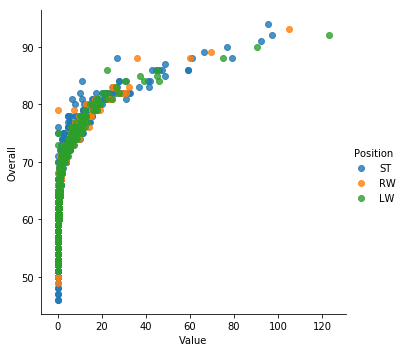

In [6]:
# 比如我想看看哪个位置的球员获得的总体评价和价值高，
# ST、RW、LW（the striker, the right-winger, or the left-winger.）
# hue : 以position的值分类
# fit_reg = False 不画出线性拟合线
sns.lmplot(x='Value', y='Overall', hue='Position', data=ft1, fit_reg=False)

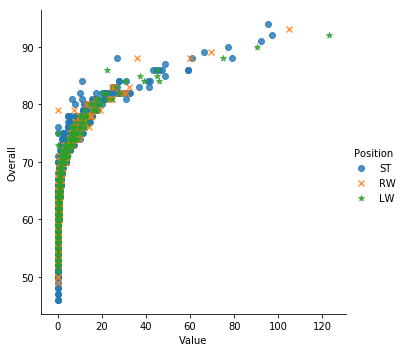

In [7]:
# 针对上图的散点重叠，单靠颜色无法区分的时候，出现了各种不同形状的描点方式
# markers : 描点的形状，字符
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position', data=ft1, fit_reg=False)

In [8]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

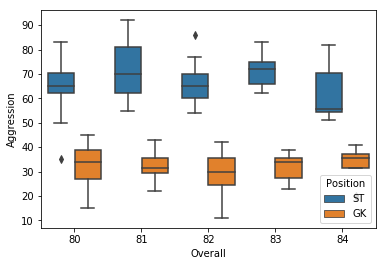

In [9]:
# 这并不像stacked bar那样数值是堆积上去的，这里每个箱型图都是独立画出来的，只不过放到一张图了而已
sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

# 热图/相关性图 heatmap

In [10]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)

In [11]:
corr = f.corr()

In [12]:
corr

,Acceleration,Aggression,Agility,Balance,Ball control
Acceleration,1.000000,0.253392,0.799476,0.702341,0.671947
Aggression,0.253392,1.000000,0.236537,0.184877,0.541160
Agility,0.799476,0.236537,1.000000,0.766645,0.701899
Balance,0.702341,0.184877,0.766645,1.000000,0.598220
Ball control,0.671947,0.541160,0.701899,0.598220,1.000000


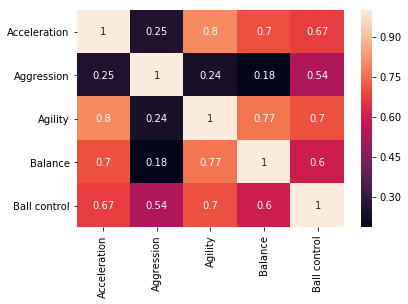

In [15]:
# data: 要绘制的correlation数据
# annot=True 在单元格里显示具体的相关性数值
sns.heatmap(data=corr, annot=True)

# 平行坐标图 (Parallel Coordinates plot) 

**有利于观测到属性值与标签之间的关系**

In [17]:
f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

In [18]:
f.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Position
12540,68.0,53.0,68.0,66.0,66.0,ST
11840,35.0,36.0,37.0,30.0,16.0,GK
13808,75.0,38.0,62.0,79.0,62.0,ST
203,79.0,69.0,84.0,91.0,86.0,ST
12825,28.0,20.0,34.0,48.0,23.0,GK


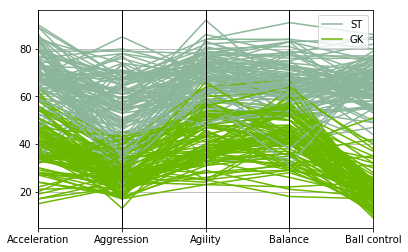

In [19]:
parallel_coordinates(f, 'Position')

# 练习

In [20]:
pokemon = pd.read_csv('./data/pokemon/Pokemon2.csv', index_col=0)

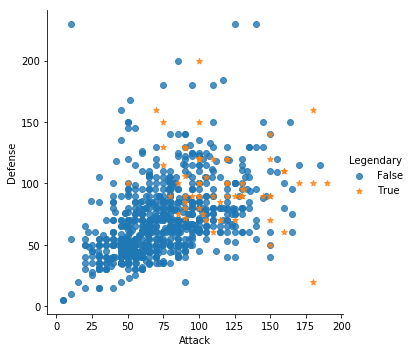

In [21]:
sns.lmplot(x='Attack', y='Defense', markers=['o', '*'], hue='Legendary', data=pokemon, fit_reg=False)

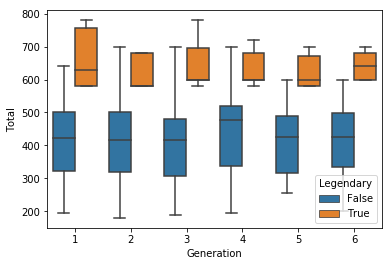

In [22]:
sns.boxplot(x="Generation", y="Total", hue='Legendary', data=pokemon)

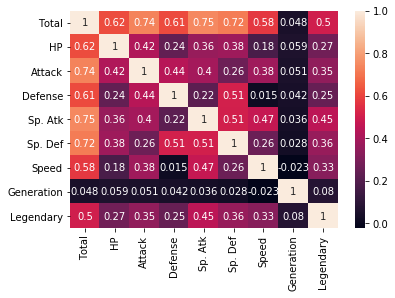

In [23]:
sns.heatmap(data=pokemon.corr(), annot=True)

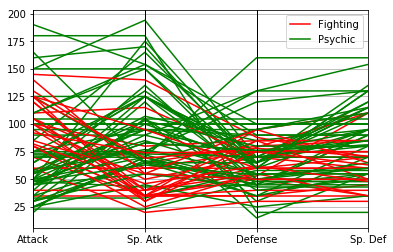

In [27]:
p = (pokemon[(pokemon['Type 1'].isin(["Psychic", "Fighting"]))]
         .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']]
    )

parallel_coordinates(p, 'Type 1', color=['red', 'green'])

# 总结

### 三种多维分析的工具

- 1、FacetGrid
- 2、加入一些视觉辅助变量：颜色、形状、分组等
- 3、总结性的：热图(heatmap)、平行坐标图(Parallel Coordinates Plot)